In [2]:
import numpy as np

def dist(x,y):
  return sum([abs(x[i]-y[i]) for i in range(len(x))])

def jacobi( A , b , max_iter=1000 , x0 = None , tol = 1.0e-5):
  '''Método de Jacobi no sistema Ax=b'''

  n = len(A)
  if (x0 == None):
    x0 = [0]*n

  x_new = x0.copy()

  err = 1
  num_iter = 0
  while err>tol and num_iter<max_iter:
    x0 = x_new.copy()
    for i in range(n):
      x_new[i] = (b[i] - sum([A[i][j]*x0[j] for j in range(n) if j != i]))/A[i][i]

    num_iter += 1
    err = dist(x_new , x0)

  if num_iter == max_iter:
    raise Exception("Número máximo de iterações atingido")

  return x_new, num_iter

  


In [3]:
def gauss_seidel( A , b , max_iter= 10**6 , x = None , tol = 1.0e-5):
  '''Método de Jacobi no sistema Ax=b'''

  n = len(A)
  if (x == None):
    x0 = [0]*n
  else :
    x0=x.copy()

  err = 1
  num_iter = 0
  while err>tol and num_iter<max_iter:
    err = 0
    for i in range(n):
      y = ( b[i] - sum([A[i][j]*x0[j] for j in range(i) ])\
                  - sum([A[i][j]*x0[j] for j in range(i+1,n) ]) )\
                  /A[i][i]

      err += abs(x0[i] - y)
      x0[i]=y


    num_iter += 1

  if num_iter == max_iter:
    raise Exception("Número máximo de iterações atingido")

  return x0, num_iter


### Fazendo vários testes e pegando os valores em uma lista

In [5]:
import time
from tqdm import tqdm

dados_gauss_seidel=[]


for i in tqdm(range (1,151)):                       # Fazendo calculo até matrizes de indice 150
    A = np.random.randint(low=-3,high=3,size=(i,i)) # cria uma matriz A de tamanho i para esse laço
    b = np.random.randint(low=-10,high=10,size=i)   # cria uma matriz b de tamanho para esse laço 
    for k in range(i):                              # Força as entradas diagonais a ser maior para poder ser diagonalmente dominante
        A[k][k] = 100

    time_inicio  = time.time()                           # começa o temporizador
    for n in range(10):                                  # executa o codigo calculo 10x:
        gauss_seidel(A,b)[0]                        
    time_fim = time.time()                               # finaliza o tempporizador ao fim do laço for
    dados_gauss_seidel.append([i, (time_fim - time_inicio)/10])          # adiciona o indice e o tempo médio a lista 

dados_gauss_seidel = np.array(dados_gauss_seidel)

for n in range (0, 150):                                 #print dos dados
    print ("ordem: ",int(dados_gauss_seidel[n,0]), " tempo de execução: ", dados_gauss_seidel[n,1])


    



100%|██████████| 150/150 [02:30<00:00,  1.00s/it]

ordem:  1  tempo de execução:  0.0
ordem:  2  tempo de execução:  0.0001008749008178711
ordem:  3  tempo de execução:  9.906291961669922e-05
ordem:  4  tempo de execução:  0.0001998424530029297
ordem:  5  tempo de execução:  0.0003998279571533203
ordem:  6  tempo de execução:  0.00029995441436767576
ordem:  7  tempo de execução:  0.00039970874786376953
ordem:  8  tempo de execução:  0.0002999305725097656
ordem:  9  tempo de execução:  0.0005995035171508789
ordem:  10  tempo de execução:  0.0005996465682983398
ordem:  11  tempo de execução:  0.0010994434356689452
ordem:  12  tempo de execução:  0.0010995149612426757
ordem:  13  tempo de execução:  0.0015990018844604492
ordem:  14  tempo de execução:  0.0012990713119506836
ordem:  15  tempo de execução:  0.0020989179611206055
ordem:  16  tempo de execução:  0.0021985054016113283
ordem:  17  tempo de execução:  0.0019987821578979492
ordem:  18  tempo de execução:  0.0017990589141845704
ordem:  19  tempo de execução:  0.001998567581176758


## Criação dos gráficos de regressão

Coeficientes da Linear:  0.0023426479842059956 -0.07684076787108009
Coeficientes da Quadratica:  [ 2.67775715e-02 -1.74754962e-03  2.70874014e-05]
Coeficientes da Cubica:  [-1.20844404e-02  1.29046926e-03 -2.30441930e-05  2.21331542e-07]
Coeficientes da Quártica:  [ 4.61927845e-03 -8.57763655e-04  4.04808692e-05 -4.31626791e-07
  2.16211369e-09]


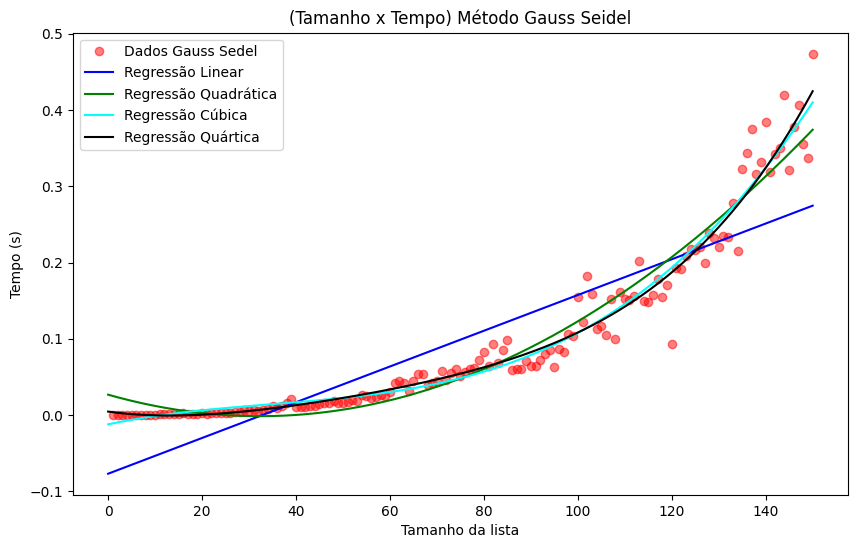

In [84]:
import matplotlib.pyplot as plt

dados = dados_gauss_seidel.copy()
m = dados.shape[0]
dominio = np.linspace(0, 150, 1000)

# ==================== LINEAR =============================== (por fórmula)
x , y = dados[:,0] , dados[:,1]
n = len(x)
soma_x = np.sum(x)
soma_y = np.sum(y)
soma_xy = np.sum(x*y)
soma_x_squared = np.sum(x**2)

coef_a = (n * soma_xy - soma_x * soma_y) / (n * soma_x_squared - soma_x**2)
coef_b = (soma_y - coef_a * soma_x) / n

linear = [coef_a * t + coef_b for t in dominio]

print("Coeficientes da Linear: ", coef_a, coef_b)
#===================== QUADRATICA ============================
# Define a matriz de coeficientes
A = np.zeros((m, 3))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = dados[i, 0]
    A[i, 2] = dados[i, 0] ** 2

# Define o vetor independente
b = dados[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b
alpha = np.linalg.solve(B, c)

quadratica = [alpha[0] + alpha[1] *t + alpha[2] * t**2  for t in dominio]
print("Coeficientes da Quadratica: ", alpha)

#===================== CUBICA ============================
# Define a matriz de coeficientes
A = np.zeros((m, 4))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = dados[i, 0]
    A[i, 2] = dados[i, 0] ** 2
    A[i, 3] = dados[i, 0] ** 3

# Define o vetor independente
b = dados[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b
alpha = np.linalg.solve(B, c)

cubica = [alpha[0] + alpha[1] * t + alpha[2] * t ** 2 +alpha[3] * t ** 3 for t in dominio]
print("Coeficientes da Cubica: ", alpha)


#===================== QUARCTICA =========================
# Define a matriz de coeficientes
A = np.zeros((m, 5))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = dados[i, 0]
    A[i, 2] = dados[i, 0] ** 2
    A[i, 3] = dados[i, 0] ** 3
    A[i, 4] = dados[i, 0] ** 4

# Define o vetor independente
b = dados[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b
alpha = np.linalg.solve(B, c)

quartica = [alpha[0] + alpha[1] *t + alpha[2] * t**2 +alpha[3] * t**3 + alpha[4] * t**4   for t in dominio]
print("Coeficientes da Quártica: ", alpha)




# =================== CRIAÇÃO DO GRRÁFICO COM TODAS AS INFORMAÇÕES =============================

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.set_title("(Tamanho x Tempo) Método Gauss Seidel")
axs.set_xlabel("Tamanho da lista")
axs.set_ylabel("Tempo (s)")
dados = dados.transpose()
axs.plot(x, y, 'ro',alpha=0.5, label ='Dados Gauss Sedel')
axs.plot(dominio, linear, 'b',label ='Regressão Linear')
axs.plot(dominio, quadratica, 'green',label ='Regressão Quadrática')
axs.plot(dominio, cubica, 'cyan',label ='Regressão Cúbica')
axs.plot(dominio, quartica, 'black',label ='Regressão Quártica')






plt.legend()
plt.show()




### Observações

As Regressões cúbicas e quárticas são as que mais se aproximam